Name: Courtney Hodge

Due Date: 5/4/23

Assignment: Project 2

# Machine Learning Project 2
##  <font color='FA0606'>Note:
> I completed this project **by myself** so please grade with that knowledge in mind. I was my own team and I tried my best to provide a quality assignment with as few errors as possible. Part B was the most difficult portion of this project becuase I got confused with the directions. There was a lot of ambiguity to where I just had to trust my instincts and hope that how I proceeded with the assignment worked fine. 

> Please also note that I gave this project as much attention as I possibly could. The last week of school was a nightmare and I hope that you can accept this assignment at the time it was submitted. Thank you for your attention!

## Data Wrangling

> mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> load in iris data

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
iris = datasets.load_iris()

data = iris.data
label = iris.target

## A) d-index and other classification measures (50 points)












###<font color='#97F2E8'>  What’s the advantage of d-index?

[Lecture067](https://baylor.instructure.com/courses/182342/files/12781256?wrap=1)
> d-index is the 7 th measure

>  **d_index is not only convenient for comparing ML
results, but also an effective measure to reflect the
true ML status in imbalanced learning**

> d = log(2)(1+a) + log(2)(1 + (s+p)/2)

>where a,s, and p, represent the corresponding diagnostic accuracy, sensitivity, and specificity respectively

> 1.33<D-index<=2  (if it reaches 1.8 --> good)


###<font color='#97F2E8'>   How can you calculate d-index for multi-class classification?

> you can do so by referencing the [d-index function below](https://colab.research.google.com/drive/1Va826ILbfNYa8L6-Jw5psSA5LJLeNzJT#scrollTo=9E-gzCSg5Djq&line=24&uniqifier=1). This function takes the true labels and predicted labels of the iris dataset (or any dataset) and it finds the TP, FP, TN, FN logical assignments, finds the needed accuracy, sensitivity, and specificity classification measures, and uses an np array to append those calculations into an array that returns the answers.

### <font color='#97F2E8'> Do SVM classification for Iris data with the first 70% training and remaining 30% for test and calculate the following classification measures and explain their meaning.

### Which ones are more representative, why?
> I would have to say that the classification measures used to find the d-index, f1_micro and f1-macro, roc_auc_score, and balanced_accuracy are all pretty representative. All classification measures but roc-auc-score is perfect in predicting their values for the iris data and they all do a pretty good job.


<font color='F5524C'> Train/ Test Split for 70/30

In [ ]:
#---split into 70/30---#
def split (data, labels, size):
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  
  #---standardize the data---#
  X = StandardScaler().fit_transform(data)

  train_data, test_data, train_data_label, test_data_label = train_test_split(X, labels, test_size = size, random_state = 42)

  return train_data, test_data, train_data_label, test_data_label

<font color='F5524C'>SVM Function

In [ ]:
def SVM(data, label):
  #---conduct Regular SVM for iris data---#
  from sklearn import svm
  from sklearn.model_selection import cross_val_score
  import numpy as np

  #---split 70/30---#
  iris_train_data, iris_test_data, iris_train_label, iris_test_label = split(data, label, 0.3)

  #---create an SVM instance---#
  clf = svm.SVC(kernel = 'rbf', gamma = 0.5, C = 1)

  #---fit data---#
  clf.fit(iris_train_data, iris_train_label)

  #---train data---#
  iris_test_pred_label = clf.predict(iris_test_data)

  return iris_test_label, iris_test_pred_label


<font color='F5524C'>d-index w/ other metrics
>reference above definition
>

In [ ]:
def compute_measure(true_label, pred_label):
  import numpy as np
  t_indx = (true_label == pred_label)
  f_indx = np.logical_not(t_indx)

  p_indx = (true_label > 0)     #positive targets
  n_indx = np.logical_not(p_indx)    #negative targets

  tp = np.sum(np.logical_and(t_indx, p_indx))    #TP
  tn = np.sum(np.logical_and(t_indx, n_indx))    #TN

  fp = np.sum(n_indx) - tn
  fn = np.sum(p_indx) - tp
  tp_fp_tn_fn_list = []

  tp_fp_tn_fn_list.append(tp)
  tp_fp_tn_fn_list.append(fp)
  tp_fp_tn_fn_list.append(tn)
  tp_fp_tn_fn_list.append(fn)
  tp_fp_tn_fn_list = np.array(tp_fp_tn_fn_list)

  tp = tp_fp_tn_fn_list[0]
  fp = tp_fp_tn_fn_list[1]
  tn = tp_fp_tn_fn_list[2]
  fn = tp_fp_tn_fn_list[3]

  with np.errstate(divide = 'ignore'):
    sen = (1.0 * tp) / (tp + fn)

  with np.errstate(divide = 'ignore'):
    spec = (1.0 * tn) / (tn + fp)

  with np.errstate(divide = 'ignore'):
    ppr = (1.0 * tp) / (tp + fp)

  with np.errstate(divide = 'ignore'):
    npr = (1.0 * tn) / (tn + fn)

  with np.errstate(divide = 'ignore'):
    f1 = tp / (tp + 0.5 * (fp + fn))

  acc = (tp + tn) * 1.0 / (tp + fp + tn + fn)

  d = np.log2(1 + acc) + np.log2( 1 + (sen + spec) / 2) 

  ans = []

  #ans.append(acc)
  #ans.append(sen)
  #ans.append(spec)
  #ans.append(ppr)
  #ans.append(npr)
  #ans.append(f1)
  print("d-index: ")
  ans.append(d)

  return ans

In [ ]:
iris_test_label, iris_test_pred_label = SVM(data, label)

compute_measure(iris_test_label, iris_test_pred_label)

d-index: 


[2.0]

<font color='F5524C'>f1-micro & f1-macro

[scikit](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

>F1 = 2 * (precision * recall) / (precision + recall)

>'micro' : Calculate metrics globally by counting the total true positives, false negatives and false positives.

> 'macro' : 

In [ ]:
def f1_score(data, label):
  from sklearn.metrics import f1_score

  iris_test_label, iris_test_pred_label = SVM(data, label)

  f1_micro = f1_score(iris_test_label, iris_test_pred_label, average = 'micro')

  f1_macro = f1_score(iris_test_label, iris_test_pred_label, average = 'macro')

  print("f1-micro: ", f1_micro, '\n')
  print("f1-macro: ", f1_macro, '\n')


In [ ]:
f1_score(data, label)

f1-micro:  1.0 

f1-macro:  1.0 



<font color='F5524C'> balanced_accuracy

[scikit](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score)

> The balanced_accuracy_score function computes the balanced accuracy, which avoids inflated performance estimates on imbalanced datasets. It is the macro-average of recall scores per class or, equivalently, raw accuracy where each sample is weighted according to the inverse prevalence of its true class. Thus for balanced datasets, the score is equal to accuracy.

In [ ]:
def bal_acc(data, label):
  from sklearn.metrics import balanced_accuracy_score

  iris_test_label, iris_test_pred_label = SVM(data, label)

  #---balanced_accuracy---#
  balanced_accuracy = balanced_accuracy_score(iris_test_label, iris_test_pred_label)

  print("balanced_accuracy: ", balanced_accuracy, '\n')

In [ ]:
bal_acc(data, label)

balanced_accuracy:  1.0 



<font color='F5524C'> roc_auc_score

[scikit](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
>Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [ ]:
def roc_auc(data, label):
  from sklearn.datasets import load_iris
  from sklearn.metrics import roc_auc_score
  from sklearn.linear_model import LogisticRegression
  X, y = load_iris(return_X_y=True)
  clf = LogisticRegression(solver="liblinear").fit(X, y)
  roc_auc = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

  print("roc_auc_score: ", roc_auc, "\n")

In [ ]:
roc_auc(data, label)

roc_auc_score:  0.9913333333333334 



## B) Bagging-SVM (50 points)
##  <font color='FA0606'>Note:
>Disclaimer: I DID NOT standardize the below datasets for this portion of the project because I found that standardizing the data standardizes the label columns of the data too. I was struggling with indexing the data labels aside from the data for all three and I just decided that I would be able to make more progress if I just continued without standardizing.

### <font color='#97F2E8'> Implement a Bagging SVM for three datasets by following the requirements
* credit_risk_small_data
* credit_data_simulate.
* cybersecurity_data

<font color='F5524C'> load all of the above data files

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

credit_risk_small = pd.read_csv ('/content/drive/MyDrive/Baylor F22 - S23/2-Spring 23/Machine Learning/credit_risk_small_data.csv')

credit_data_simulate = pd.read_csv ('/content/drive/MyDrive/Baylor F22 - S23/2-Spring 23/Machine Learning/credit_data_simulate - credit_data_simulate (2).csv')

cybersecurity= pd.read_csv ('/content/drive/MyDrive/Baylor F22 - S23/2-Spring 23/Machine Learning/cybersecurity_data.csv')


<font color='F5524C'> take each label from each dataframe

In [ ]:
credit_risk_label = credit_risk_small[['Delinquency']]
#credit_risk_small

In [ ]:
credit_simulate_label = credit_data_simulate[['Industry sector labels from 1-12']]

#I am dropping this because it was dropped in HW#3 and I didn't want to confuse myself
credit_data_simulate = credit_data_simulate.drop(columns = ['Credit status']) 

#credit_data_simulate

In [ ]:
cybersecurity_label = cybersecurity[['class']]
#cybersecurity


<font color='F5524C'> Train test split 80/20

In [ ]:
#---split into 80/20---#
def new_split (data, labels, size):
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  
  X = data#StandardScaler().fit_transform(data)

  train_data, test_data, train_data_label, test_data_label = train_test_split(X, labels, test_size = size, random_state = 42)

  return train_data, test_data, train_data_label, test_data_label

<font color='F5524C'> new_SVM 
>function for the second half of the project! (works the same but with adjustments)

In [ ]:
def new_SVM(train_data, train_label, test_data, name):
  #---conduct Regular SVM for iris data---#
  from sklearn import svm
  from sklearn.model_selection import cross_val_score
  import pandas as pd
  #import numpy as np

  #---split 80/20---#
  #train_data, test_data, train_label, test_label = new_split(data, label, 0.2)

  #---create an SVM instance---#
  clf = svm.SVC(kernel = 'rbf', gamma = 0.5, C = 1)

  #---fit data---#
  clf.fit(train_data, train_label)

  #---train data---#
  test_pred_label = clf.predict(test_data)

  print('Do SVM for ', name, ': done')
  print(test_pred_label, '\n\n')

  return test_pred_label


### <font color='#97F2E8'> 1. Use first 80% data for training and the remaining 20% for test. Do SVM prediction
> Buckle up because I'm going to explain this as best as I can.


<font color='F5524C'> Part I:
> This first chunk of data called does a normal train/test split on each of the datasets for part b. The split is with an 80/20, train/test division.

>After the train & test data and train & test labels have been retreaved, the SVM function is called to predict the labels of the test data. The result SVM call for each of these datasets are shown below

In [ ]:
###########################
#credit_risk_small
#
#---call the new_split function using 20/80 split---#
cred_risk_train, cred_risk_test, cred_risk_train_label, cred_rist_test_label = new_split(credit_risk_small, credit_risk_label, 0.2)
#
#---call the new_SVM function---#
cred_risk_pred_test_label = new_SVM(cred_risk_train, cred_risk_train_label, cred_risk_test, 'cred_risk_train')
#
###########################


###########################
#credit_data_simulate
#
#---call the new_split function---#
cred_sim_train, cred_sim_test,  cred_sim_train_label, cred_sim_test_label = new_split(credit_data_simulate, credit_simulate_label, 0.2)
#
#---call the new_SVM function---#
cred_sim_pred_test_label = new_SVM(cred_sim_train, cred_sim_train_label, cred_sim_test, 'credit_data_simulate')
#
###########################


###########################
#cybersecurity
#
#---call the new_split function---#
cyber_train, cyber_test, cyber_train_label, cyber_test_label = new_split(cybersecurity, cybersecurity_label, 0.2)
#
#---call the new_SVM function---#
cyber_pred_test_label = new_SVM(cyber_train, cyber_train_label, cyber_test, 'cybersecurity')
#
###########################



#pd.DataFrame(cred_risk_train)

Do SVM for  cred_risk_train : done
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### <font color='#97F2E8'> 2. Randomly pick 1/2 data from training data to form three training datasets: training_1, training_2, and training_3



<font color='F5524C'> Half_data

> [geeksforgeeks: split dataset in half](https://www.geeksforgeeks.org/split-pandas-dataframe-by-rows/)

> splits the dataset passed to it in half by dividing the shape of the object by 2.

In [ ]:
#---I want to make sure I mix the data in the data frame as best as possible---#

def half_data(data, name):
  import pandas as pd

  mix_data = data#.sample(frac = 1).reset_index()

  #---find shape of dataframe and divide it by 2---#
  half_ind = int(mix_data.shape[0] / 2)

  #---half the data---#
  half_data = mix_data.iloc[:half_ind, :]

  print("randomly split ", name, ' train in half: done', '\n')
  #half_data
  return half_data

<font color='F5524C'> mix_data
> randomizes the dataset passed to it by 're ordering' the rows of the data and then recounting them

In [ ]:
def mix_data(data):
  return data.sample(frac = 1).reset_index()

<font color='F5524C'> Part II:

> Okay, so this next chunk of code calls to the mix_data function to mix up the rows of data inside each original dataset of part B.

> Then a new call to train/test split is conducted with the newly randomized dataset of part B. I will refer to the 'newly randomized datasets of part B' (credit_risk_data, credit_simulate_data, and cybersecurity_data) as X,Y and Z. The train & test data and train & test labels are captured for X, Y and Z.

> Lastly, the train data for X, Y and Z are each halved. **This means that the train data (80% of X, Y , or Z) is split in 2**. This was accomplished with a call to half_data.

> training_1 gets the output from X

>training_2 gets the output from Y

>training_3 gets the output from Z

In [ ]:
###########################
#credit_risk_small
#
#---mix the data to make it random---#
mixed_credit_risk = mix_data(credit_risk_small)
#
#---call train_test_split---#
cred_risk_train, cred_risk_test, cred_risk_train_label, cred_rist_test_label = new_split(mixed_credit_risk, credit_risk_label, 0.2)
#
#---halve the training data---#
half_cred_risk_train = pd.DataFrame(cred_risk_train)
#
training_1 = half_data(half_cred_risk_train, 'cred_risk_train')
#
###########################


###########################
#credit_data_simulate
#
#---mix the data to make it random---#
mixed_credit_sim = mix_data(credit_data_simulate)
#
#---call the new_split function---#
cred_sim_train, cred_sim_test,  cred_sim_train_label, cred_sim_test_label = new_split(mixed_credit_sim, credit_simulate_label, 0.2)
#
#---halve the training data---#
half_cred_sim_train = pd.DataFrame(cred_sim_train)
#
training_2 = half_data(half_cred_sim_train, 'credit_data_simulate')
###########################


###########################
#cybersecurity
#
#---mix the data to make it random---#
mixed_cyber = mix_data(cybersecurity)
#
#---call the new_split function---#
cyber_train, cyber_test, cyber_train_label, cyber_test_label = new_split(mixed_cyber, cybersecurity_label, 0.2)
#
#---halve the training data---#
half_cyber_train = pd.DataFrame(cyber_train)
#
training_3 = half_data(half_cyber_train, 'cyber_train')
###########################
#half_cred_risk_train

randomly split  cred_risk_train  train in half: done 

randomly split  credit_data_simulate  train in half: done 

randomly split  cyber_train  train in half: done 



### <font color='#97F2E8'> 3. run SVM using training_1, training_2, and training_3 to predict the test data: we can them SVM_1, SVM_2, and SVM_3


<font color='F5524C'> Part III:

> Okay, hang in there. This is where it gets confusing. You should already know that training_1, training_2, and training_3 were created above.  

> Now, I want to get the labels off of those datasets here! I think it's pretty self explanitory what I did in the first bit

>The second bit calls to that good old 'new_SVM' function and calculates the SVM classification for training_1, training_2, and training_3 data.

> It is important to note again that (for example) trainin_1 refers to half of the training data from the mixed credit_risk dataset from part B.

>The results are shown below!

In [ ]:
#---first, we want to capture the labels for all the training sets---#

training_1_lab = training_1[['Delinquency']]                        #references credit_risk 

training_2_lab = training_2[['Industry sector labels from 1-12']]   #references credit_simulate

training_3_lab = training_3[['class']]                              #references cybersecurity


#---second, we call the SVM function for each training sets---#

SVM_1 = new_SVM(training_1, training_1_lab, cred_risk_test, 'cred_risk_test = training_1')

SVM_2 = new_SVM(training_2, training_2_lab, cred_sim_test, 'cred_sim_test = training_2')

SVM_3 = new_SVM(training_3, training_3_lab, cyber_test, 'cyber_test = training_3')

Do SVM for  cred_risk_test = training_1 : done
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### <font color='#97F2E8'>  4. Determinate the final label for each test entry by doing the following voting (a) Pick the predicted label with maximum votes, say 1 (svm_1), -1 (svm_2), 1 (svm_3), then final label should be 1

<font color='F5524C'> Bagging_SVM

>a function to calculate the bagging svm for a dataset

In [ ]:
def Bagging_SVM(X, y, test):
  from sklearn.svm import SVC
  from sklearn.ensemble import BaggingClassifier, VotingClassifier
  
  #X = X
  #y = training_1_lab

  clf = BaggingClassifier(estimator = SVC(), n_estimators = 1, random_state = None)#.fit(X, y)

  clf_predict_label = clf#.predict(test)

  #---voting---#

  return clf_predict_label

<font color='F5524C'> PVoting
> a voting classification to vote the svm classification results presented by the bagging svm function


In [ ]:
def Voting(clf1, clf2, clf3, test, name):
  from sklearn.ensemble import VotingClassifier

  result_1 = VotingClassifier(estimators = [('SVM_1', clf1), ('SVM_2', clf2), ('SVM_3', clf3)])

  result_1 = result_1.fit(X, y)

  print("Voting on ", name, ": ")
  print(result_1.predict(test))

<font color='F5524C'> Part IV: 

>Last portion (yay). Okay so this part is where I conduct a bagging svm and a voting. I will do a call to bagging svm 3 times for training_1. The same will be done for training_2 and training_3. 

> Each classification I get back will be captured with each call to Bagging_SVM. Afterwards, I will pass all three classifications to the Voting function  and the most common label for the test data will be printed below.

> Here is the call for training_1 (credit_risk)

In [ ]:
X = training_1
y = training_1_lab

clf1 = Bagging_SVM(X, y, cred_risk_test)
clf2 = Bagging_SVM(X, y, cred_risk_test)
clf3 = Bagging_SVM(X, y, cred_risk_test)

Voting(clf1, clf2, clf3, cred_risk_test, 'cred_risk_test')

Voting on  cred_risk_test : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

> Here is the call for training_2 (credit_simulate)

In [ ]:
X = training_2
y = training_2_lab

#Bagging_SVM(X, y, cred_sim_test)

clf1 = Bagging_SVM(X, y, cred_sim_test)
clf2 = Bagging_SVM(X, y, cred_sim_test)
clf3 = Bagging_SVM(X, y, cred_sim_test)

Voting(clf1, clf2, clf3,cred_sim_test , 'cred_sim_test')

Voting on  cred_sim_test : 
[1 9 9 1 1 9 1 3 1 1 3 3 1 3 3 9 9 3 3 9 1 1 3 1 1 9 3 9 1 1 3 1 3 9 3 9 9
 3 1 1 1 3 1 3 1 1 1 3 3 1 3 1 9 3 1 1 1 3 1 3 3 9 1 1 3 9 1 3 3 3 3 3 1 1
 1 3 3 3 9 1 1 1 9 3 1 3 9 1 9 1 1 3 3 1 9 1 3 3 1 1 3 9 1 9 1 9 9 1 3 3 3
 9 1 3 3 3 9 1 3 1 1 1 1 1 3 3 1 3 3 1 1 9 9 3 1 3 1 9 3 1 1 3 1 1 3 1 6 1
 3 3 3 3 3 1 1 9 1 1 1 1 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 1 1 9 3 1 9 1 3 3 3
 3 3 9 1 1 3 3 1 3 3 3 1 1 3 3 1 9 1 1 3 3 3 3 3 1 3 1 1 3 3 3 1 3 3 1 1 3
 3 3 1 9 1 1 1 9 1 1 1 1 3 1 3 3 1 3 1 3 3 3 1 1 1 1 1 1 3 3 1 1 1 3 3 9 1
 9 9 3 3 9 9 1 1 3 1 1 1 1 9 1 3 1 9 9 1 3 9 1 1 9 9 9 1 1 9 1 3 1 3 9 1 3
 3 1 3 1 1 1 3 3 1 1 1 3 1 9 3 1 1 1 1 1 1 1 1 9 1 1 9 1 1 9 1 1 1 1 3 1 3
 3]


> Here is the call for training_3 (cybersecurity)

In [ ]:
X = training_3
y = training_3_lab

#Bagging_SVM(X, y, cyber_test)

clf1 = Bagging_SVM(X, y, cyber_test)
clf2 = Bagging_SVM(X, y, cyber_test)
clf3 = Bagging_SVM(X, y, cyber_test)

Voting(clf1, clf2, clf3, cyber_test, 'cyber_test')

Voting on  cyber_test : 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


###<font color='#97F2E8'>  5. Compare the performance of SVM and the Bagging-SVM for the two datasets and draw your conclusion


<font color='F5524C'> Result #1: 

> from looking at the SVM on cred_risk_test, it is clear that using voting on the bagging classifier showed that the labels for all of the test data for this dataset were most likely going to be '0'. It is very faint to see it in this top and bottom comparison, but some indices in the top array have 1s in them. This shows that from a number of bagging svm calls with this sample, the most common label results will be 0.Ultimatley, the voting SVM looks to be more accuracte.
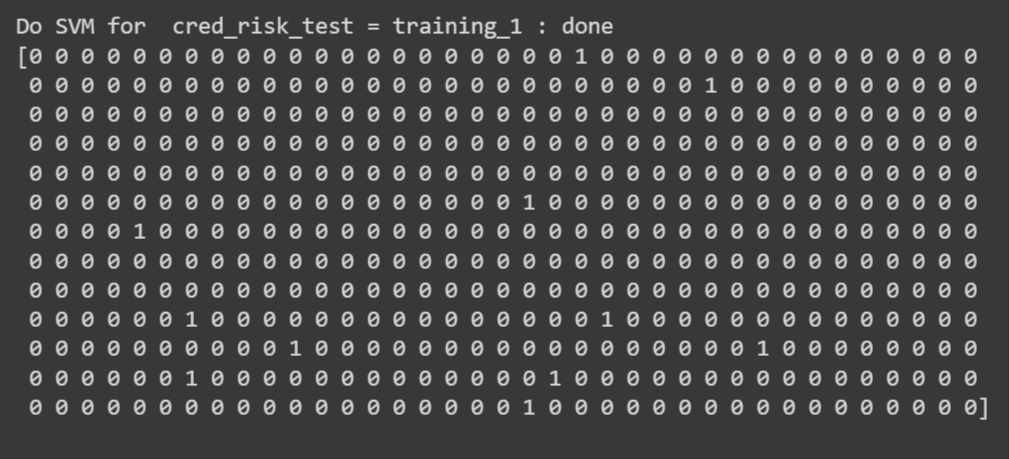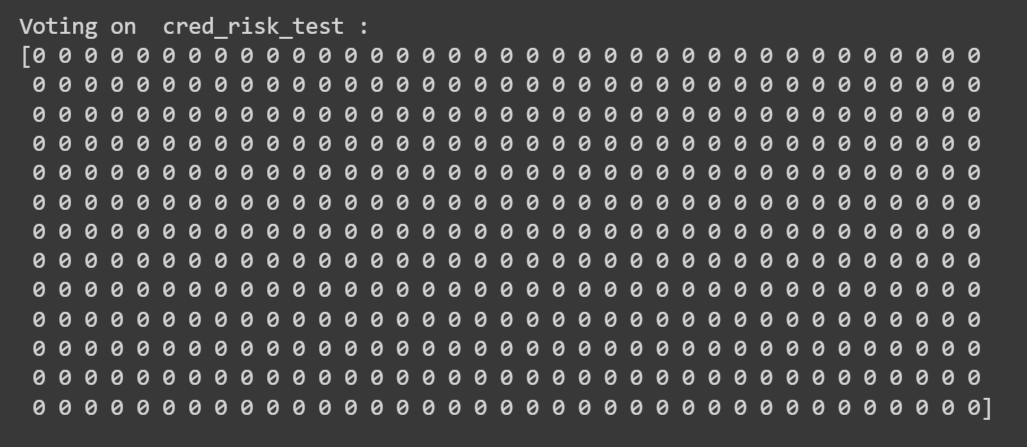

<font color='F5524C'> Result #2:

> The results of the voting on the SVM bagging classifier are much different in the credit_sim_test. There's a lot to take in here but it should be known that when the SVM function is run multiple times, the labels themselves do change a lot. The results of the voting classifier shows calmness over the labels presented in the SVM. Ultimately, I would trust the label results of the voting on bagging svm classification more.
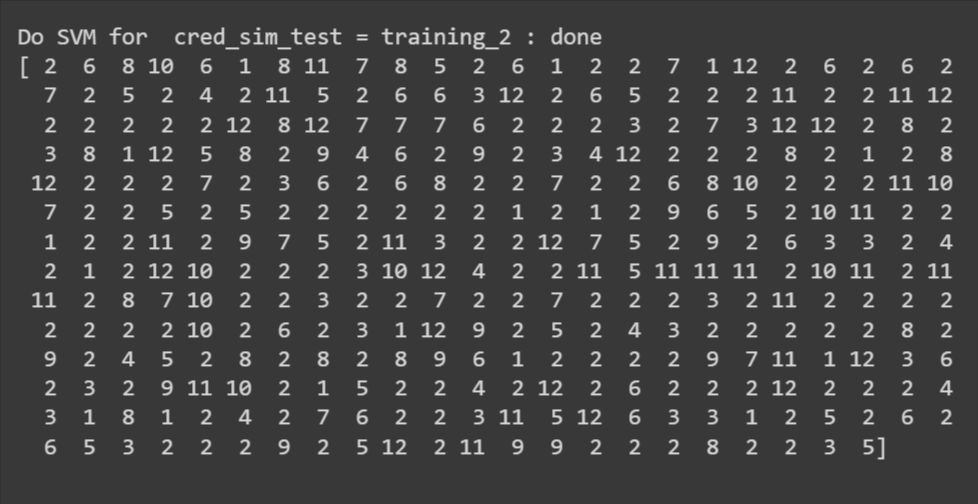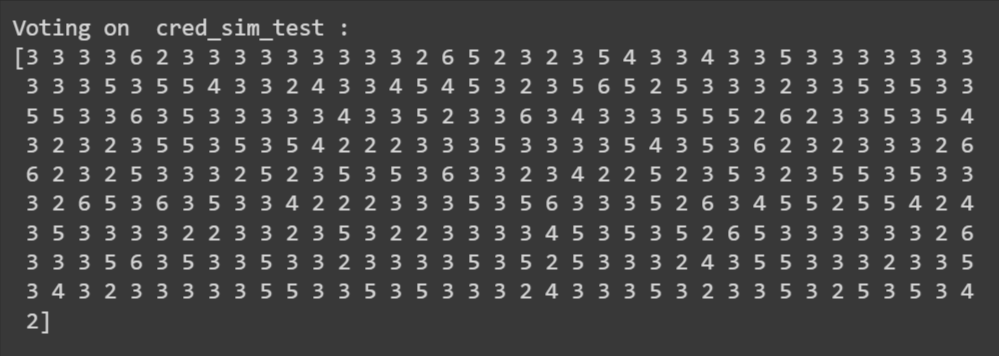

<font color='F5524C'> Result #3: 

>The results of the voting classifier with the cybersecurity dataset are pretty spot on to the results coming from the SVM classifier. This means that both have very good accuracy when determining the labels of the sampled cyber_test_data. Ultimately, I would rely on either or, but I would spare myself the work by just using the SVM.
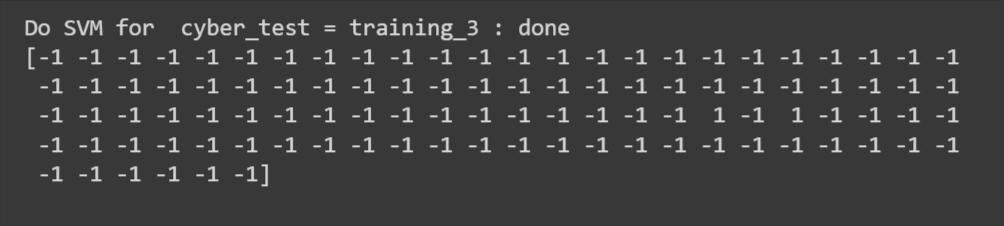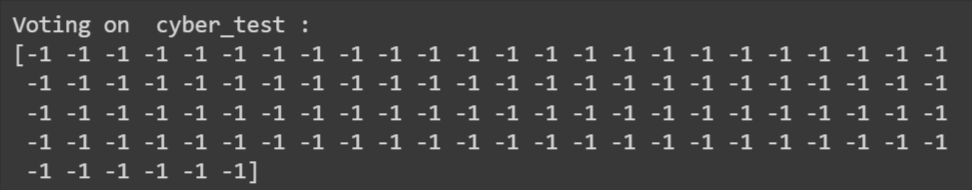